In [1]:
import numpy as np
import soundfile as sf 
from IPython.display import Audio
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import math
from numpy.lib import stride_tricks

def pad(x, max_len=56000):
    x_len = x.shape[0]
    if x_len >= max_len:
        return x[:max_len]
    # need to pad
    num_repeats = (max_len / x_len)+1
    x_repeat = np.repeat(x, num_repeats)
    padded_x = x_repeat[:max_len]
    return padded_x


def get_log_spectrum(x):
    s = librosa.core.stft(x, n_fft=1024, win_length=1024, hop_length=512)
    a = np.abs(s)**2
    #melspect = librosa.feature.melspectrogram(S=a)
    feat = librosa.power_to_db(a,ref=np.max)
    return feat


def compute_mfcc_feats(x):
    mfcc = librosa.feature.mfcc(x, sr=16000, n_mfcc=128)
    delta = librosa.feature.delta(mfcc)
    delta2 = librosa.feature.delta(delta)
    feats = np.concatenate((mfcc, delta, delta2), axis=0)
    return feats

def compute_features(x):
    #file_name = './asv2017/ASVspoof2017_V2_train/T_1000001.wav'
    return np.concatenate((get_log_spectrum(x),compute_mfcc_feats(x)))


def save_spectogram(file_name,output):
    clip, sample_rate = sf.read(file_name)
    a = get_log_spectrum(clip).T
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    librosa.display.specshow(a)
    plt.savefig(output, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close('all')

In [3]:
dataset_labels = ['train','dev','eval']
# dataset_labels = ['eval']

for dataset in dataset_labels:
    feature_file = os.path.join(os.getcwd(), 'features_labels', 'feature_label_{}.npy'.format(dataset))

    # If all the features and labels are extracted and stored into './feature_label.txt', then directly load this file;
    # Otherwise, generate this file first:
    if os.path.isfile(feature_file):
        print("The features has already been extracted!")
    else:
        print('Feature extraction for ' + dataset + ' has not been done. Extract Void features...')
        # PREPARATION:
        # Path to data:
        data_path = os.path.join(os.getcwd(), 'asv2017', 'ASVspoof2017_V2_{}'.format(dataset))
        # Protocol of data:
        if dataset == 'train':
            protocol = os.path.join(os.getcwd(), 'asv2017' , 'protocol_V2', 'ASVspoof2017_V2_train.trn.txt')
        elif dataset == 'dev':
            protocol = os.path.join(os.getcwd(), 'asv2017' , 'protocol_V2', 'ASVspoof2017_V2_dev.trl.txt')
        else:
            protocol = os.path.join(os.getcwd(), 'asv2017' , 'protocol_V2', 'ASVspoof2017_V2_eval.trl.txt')
        # Load the filenames and corresponding labels:
        fp = open(protocol)
        lines = fp.readlines()
        name_seq = []
        label_seq = []
        for line in lines:
            str_list = line.split()
            name_seq.append(str_list[0])
            label_seq.append(str_list[1])
            
    for name_idx in np.arange(len(name_seq)):
        print(name_idx)
        #Obtain the name of current file:
        filename = name_seq[name_idx]
        # Obtain the label of current file:
        label = label_seq[name_idx]
        out = "./Features/"+dataset+"/"+label+"/"+str(name_idx)+".png"
        ims = save_spectogram(file_name=os.path.join(data_path, filename),output=out)

Feature extraction for train has not been done. Extract Void features...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
2

1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045


598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847


2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652


5729
5730
5731
5732
5733
5734
5735
5736
5737
5738
5739
5740
5741
5742
5743
5744
5745
5746
5747
5748
5749
5750
5751
5752
5753
5754
5755
5756
5757
5758
5759
5760
5761
5762
5763
5764
5765
5766
5767
5768
5769
5770
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5793
5794
5795
5796
5797
5798
5799
5800
5801
5802
5803
5804
5805
5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904
5905
5906
5907
5908
5909
5910
5911
5912
5913
5914
5915
5916
5917
5918
5919
5920
5921
5922
5923
5924
5925
5926
5927
5928


9005
9006
9007
9008
9009
9010
9011
9012
9013
9014
9015
9016
9017
9018
9019
9020
9021
9022
9023
9024
9025
9026
9027
9028
9029
9030
9031
9032
9033
9034
9035
9036
9037
9038
9039
9040
9041
9042
9043
9044
9045
9046
9047
9048
9049
9050
9051
9052
9053
9054
9055
9056
9057
9058
9059
9060
9061
9062
9063
9064
9065
9066
9067
9068
9069
9070
9071
9072
9073
9074
9075
9076
9077
9078
9079
9080
9081
9082
9083
9084
9085
9086
9087
9088
9089
9090
9091
9092
9093
9094
9095
9096
9097
9098
9099
9100
9101
9102
9103
9104
9105
9106
9107
9108
9109
9110
9111
9112
9113
9114
9115
9116
9117
9118
9119
9120
9121
9122
9123
9124
9125
9126
9127
9128
9129
9130
9131
9132
9133
9134
9135
9136
9137
9138
9139
9140
9141
9142
9143
9144
9145
9146
9147
9148
9149
9150
9151
9152
9153
9154
9155
9156
9157
9158
9159
9160
9161
9162
9163
9164
9165
9166
9167
9168
9169
9170
9171
9172
9173
9174
9175
9176
9177
9178
9179
9180
9181
9182
9183
9184
9185
9186
9187
9188
9189
9190
9191
9192
9193
9194
9195
9196
9197
9198
9199
9200
9201
9202
9203
9204


11901
11902
11903
11904
11905
11906
11907
11908
11909
11910
11911
11912
11913
11914
11915
11916
11917
11918
11919
11920
11921
11922
11923
11924
11925
11926
11927
11928
11929
11930
11931
11932
11933
11934
11935
11936
11937
11938
11939
11940
11941
11942
11943
11944
11945
11946
11947
11948
11949
11950
11951
11952
11953
11954
11955
11956
11957
11958
11959
11960
11961
11962
11963
11964
11965
11966
11967
11968
11969
11970
11971
11972
11973
11974
11975
11976
11977
11978
11979
11980
11981
11982
11983
11984
11985
11986
11987
11988
11989
11990
11991
11992
11993
11994
11995
11996
11997
11998
11999
12000
12001
12002
12003
12004
12005
12006
12007
12008
12009
12010
12011
12012
12013
12014
12015
12016
12017
12018
12019
12020
12021
12022
12023
12024
12025
12026
12027
12028
12029
12030
12031
12032
12033
12034
12035
12036
12037
12038
12039
12040
12041
12042
12043
12044
12045
12046
12047
12048
12049
12050
12051
12052
12053
12054
12055
12056
12057
12058
12059
12060
12061
12062
12063
12064
12065
12066
1206

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2, ResNet50V2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob


# re-size all the images to this
IMAGE_SIZE = [128, 128] # change depending on dataset

# training config:
epochs = 10
batch_size = 32


train_path = './Features/train/'
valid_path = './Features/dev/'
test_path = './Features/eval/'


# useful for getting number of files
image_files = glob(train_path + '/*/*.png')
valid_image_files = glob(valid_path + '/*/*.png')
test_image_files = glob(test_path + '/*/*.png')
# useful for getting number of classes
folders = glob(train_path + '/*')

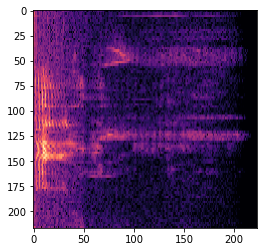

In [2]:
# look at an image for fun
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()


# add preprocessing layer to the front of VGG
res = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in res.layers:
    layer.trainable = False

In [3]:
# our layers - you can add more if you want
x = Flatten()(res.output)
x = Dense(1000, activation='relu')(x)
x = Dense(100, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [4]:
model = Model(inputs=res.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [5]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

# create an instance of ImageDataGenerator
gen = ImageDataGenerator(
  #rotation_range=20,
  #width_shift_range=0.1,
  #height_shift_range=0.1,
  #shear_range=0.1,
  #zoom_range=0.2,
  #horizontal_flip=True,
  #vertical_flip=True,
  preprocessing_function=preprocess_input
)

train_generator = gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)
valid_generator = gen.flow_from_directory(
  test_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)
# test_generator = gen.flow_from_directory(
#   test_path,
#   target_size=IMAGE_SIZE,
#   shuffle=True,
#   batch_size=batch_size,
# )

Found 3014 images belonging to 2 classes.
Found 14902 images belonging to 2 classes.


In [6]:
# early_stopping =EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('temp1.h5', save_best_only=True, save_weights_only=True)
# fit the model
r = model.fit_generator(
  valid_generator,
  validation_data=train_generator,
  epochs=epochs,
  steps_per_epoch=len(image_files) // batch_size,
  validation_steps=len(valid_image_files) // batch_size,
  callbacks=[model_checkpoint]
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
94/94 [==============================] - 154s 2s/step - loss: 8.5505 - accuracy: 0.7932 - val_loss: 6.9902 - val_accuracy: 0.5236
Epoch 2/20
94/94 [==============================] - 106s 1s/step - loss: 0.8485 - accuracy: 0.8717 - val_loss: 0.0715 - val_accuracy: 0.9770
Epoch 3/20
94/94 [==============================] - 74s 785ms/step - loss: 0.4737 - accuracy: 0.8930 - val_loss: 4.8770 - val_accuracy: 0.5047
Epoch 4/20
94/94 [==============================] - 53s 561ms/step - loss: 0.3276 - accuracy: 0.9062 - val_loss: 0.1856 - val_accuracy: 0.9216
Epoch 5/20
94/94 [==============================] - 47s 498ms/step - loss: 0.1958 - accuracy: 0.9316 - val_loss: 0.0396 - val_accuracy: 0.9864
Epoch 6/20
94/94 [==============================] - 38s 408ms/step - loss: 0.1726 - accuracy: 0.9428 - val_loss: 0.0425 - val_accuracy: 0.9876
Epoch 7/20
94/94 [==============================] - 31s 326ms/step - l

Generating confusion matrix 3014
Found 3014 images belonging to 2 classes.
[[1505    2]
 [   1 1506]]
Generating confusion matrix 1710
Found 1710 images belonging to 2 classes.
[[726  34]
 [546 404]]
Generating confusion matrix 13306
Found 13306 images belonging to 2 classes.
50
100
150
200
[[ 1270    28]
 [10015  1993]]
Instructions for updating:
Please use Model.evaluate, which supports generators.


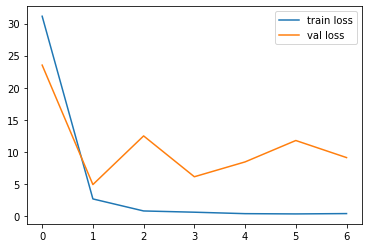

KeyError: 'acc'

In [10]:
def get_confusion_matrix(data_path, N):
    # we need to see the data in the same order
    # for both predictions and targets
    print("Generating confusion matrix", N)
    predictions = []
    targets = []
    i = 0
    for x, y in gen.flow_from_directory(data_path, target_size=IMAGE_SIZE, shuffle=False, batch_size=batch_size * 2):
        i += 1
        if i % 50 == 0:
            print(i)
        p = model.predict(x)
        p = np.argmax(p, axis=1)
        y = np.argmax(y, axis=1)
        predictions = np.concatenate((predictions, p))
        targets = np.concatenate((targets, y))
        if len(targets) >= N:
            break

    cm = confusion_matrix(targets, predictions)
    return cm

cm = get_confusion_matrix(train_path, len(image_files))
print(cm)
valid_cm = get_confusion_matrix(valid_path, len(valid_image_files))
print(valid_cm)
test_cm = get_confusion_matrix(test_path, len(test_image_files))
print(test_cm)

model.evaluate_generator(test_generator)

# plot some data

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()

from util import plot_confusion_matrix
plot_confusion_matrix(cm, labels, title='Train confusion matrix')
plot_confusion_matrix(valid_cm, labels, title='Validation confusion matrix')

In [54]:
s = np.array([[3,4,5],[7,8,9]]).T

In [43]:
import cv2
img = cv2.resize(cv2.imread('./Features/eval/spoof/eval0.png'),(128,128))[::-1]
model = Model(inputs=res.input, outputs=prediction)
model.load_weights('temp.h5')

last_layer = Model(inputs=model.input, outputs=model.get_layer(index = 177).output)
last_layer.predict(np.array([img]))

array([[ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       , 19.64752  ,  0.       ,  0.       , 25.20391  ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       , 24.345207 ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  2.3436236,  0.       ,
         0.       , 29.870077 ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0. 

<tf.Tensor 'dense_1/Relu:0' shape=(None, 100) dtype=float32>